In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('country_vaccinations.csv')

# Data exploration

In [3]:
df.head

<bound method NDFrame.head of         country iso_code        date  total_vaccinations  people_vaccinated  \
0     Argentina      ARG  2020-12-29               700.0                NaN   
1     Argentina      ARG  2020-12-30                 NaN                NaN   
2     Argentina      ARG  2020-12-31             32013.0                NaN   
3     Argentina      ARG  2021-01-01                 NaN                NaN   
4     Argentina      ARG  2021-01-02                 NaN                NaN   
...         ...      ...         ...                 ...                ...   
1262      Wales      NaN  2021-01-16                 NaN                NaN   
1263      Wales      NaN  2021-01-17            151938.0           151737.0   
1264      Wales      NaN  2021-01-18            162197.0           161932.0   
1265      Wales      NaN  2021-01-19            176186.0           175816.0   
1266      Wales      NaN  2021-01-20            190831.0           190435.0   

      people_fully_va

In [4]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1267 non-null   object 
 1   iso_code                             1118 non-null   object 
 2   date                                 1267 non-null   object 
 3   total_vaccinations                   825 non-null    float64
 4   people_vaccinated                    794 non-null    float64
 5   people_fully_vaccinated              167 non-null    float64
 6   daily_vaccinations_raw               655 non-null    float64
 7   daily_vaccinations                   1210 non-null   float64
 8   total_vaccinations_per_hundred       825 non-null    float64
 9   people_vaccinated_per_hundred        794 non-null    float64
 10  people_fully_vaccinated_per_hundred  167 non-null    float64
 11  daily_vaccinations_per_million

I decided to compare the distribution of the different vaccin first and to create 9 different dataset to represent each vaccine.

I need to convert the date into datetime.

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
dict_vaccines = {}
for vac in df['vaccines'].unique() :
    mask = (df['vaccines'] == vac)
    df_temp = df[mask]
    dict_vaccines["df_"+vac] = df_temp

In [8]:
df['iso_code'].value_counts(dropna=False)
df[df['iso_code'].isnull()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
335,England,NaN,2020-12-20,568044.0,568044.0,NaN,NaN,NaN,1.01,1.01,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
336,England,NaN,2020-12-21,NaN,NaN,NaN,NaN,37625.0,NaN,NaN,NaN,668.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
337,England,NaN,2020-12-22,NaN,NaN,NaN,NaN,37625.0,NaN,NaN,NaN,668.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
338,England,NaN,2020-12-23,NaN,NaN,NaN,NaN,37625.0,NaN,NaN,NaN,668.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
339,England,NaN,2020-12-24,NaN,NaN,NaN,NaN,37625.0,NaN,NaN,NaN,668.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,Wales,NaN,2021-01-16,NaN,NaN,NaN,NaN,8931.0,NaN,NaN,NaN,2833.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1263,Wales,NaN,2021-01-17,151938.0,151737.0,201.0,NaN,9403.0,4.82,4.81,0.01,2982.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1264,Wales,NaN,2021-01-18,162197.0,161932.0,265.0,10259.0,10123.0,5.14,5.14,0.01,3211.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1265,Wales,NaN,2021-01-19,176186.0,175816.0,370.0,13989.0,10672.0,5.59,5.58,0.01,3385.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


# Analysis of missing values and NaNs

For now I have taken a really harsh approach, removing all the NaNs.

<AxesSubplot:>

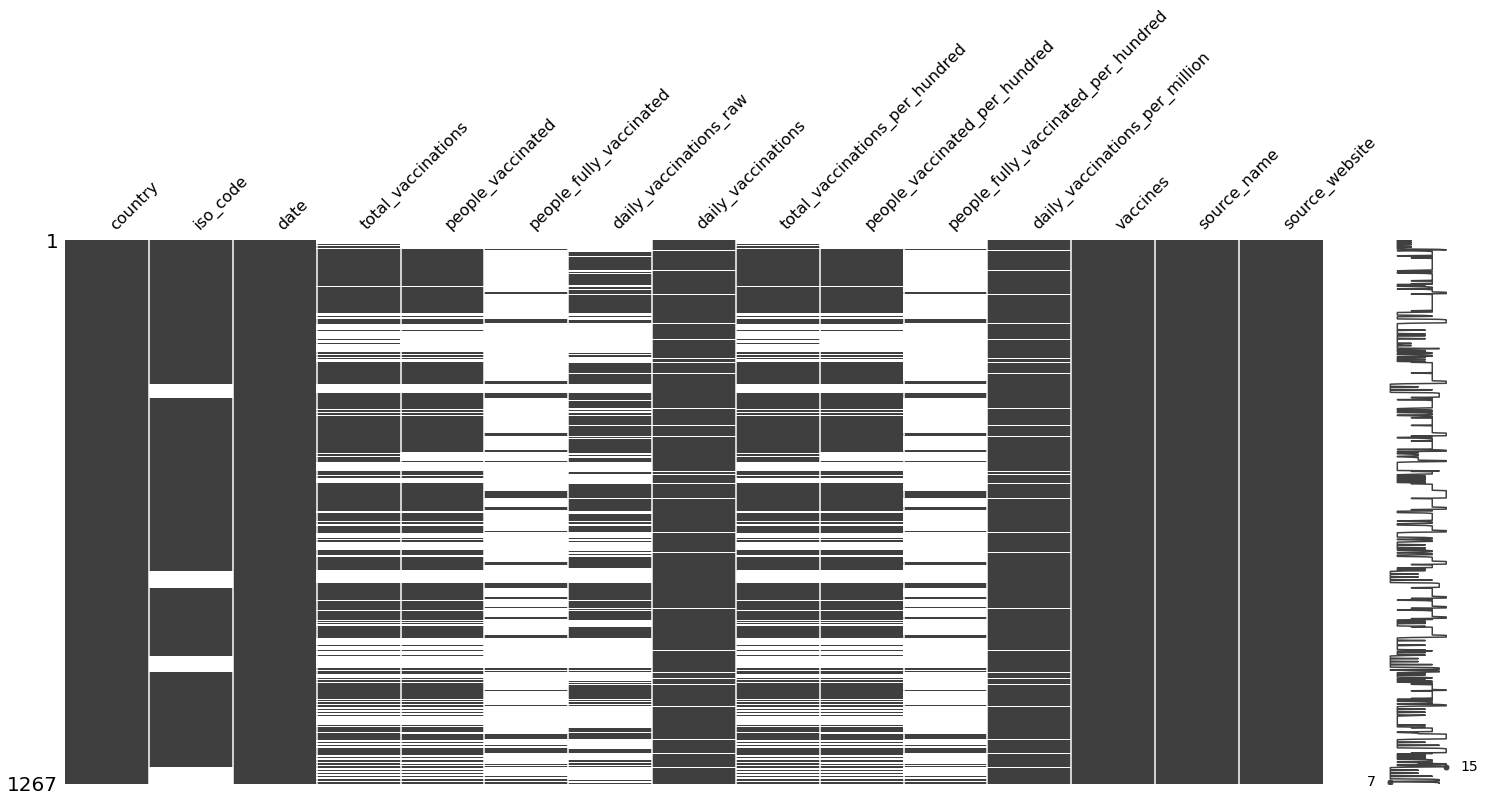

In [9]:
import missingno as msno

msno.matrix(df)

Daily_vaccinations seems to be the fullest. Some iso_code are missing.

<AxesSubplot:>

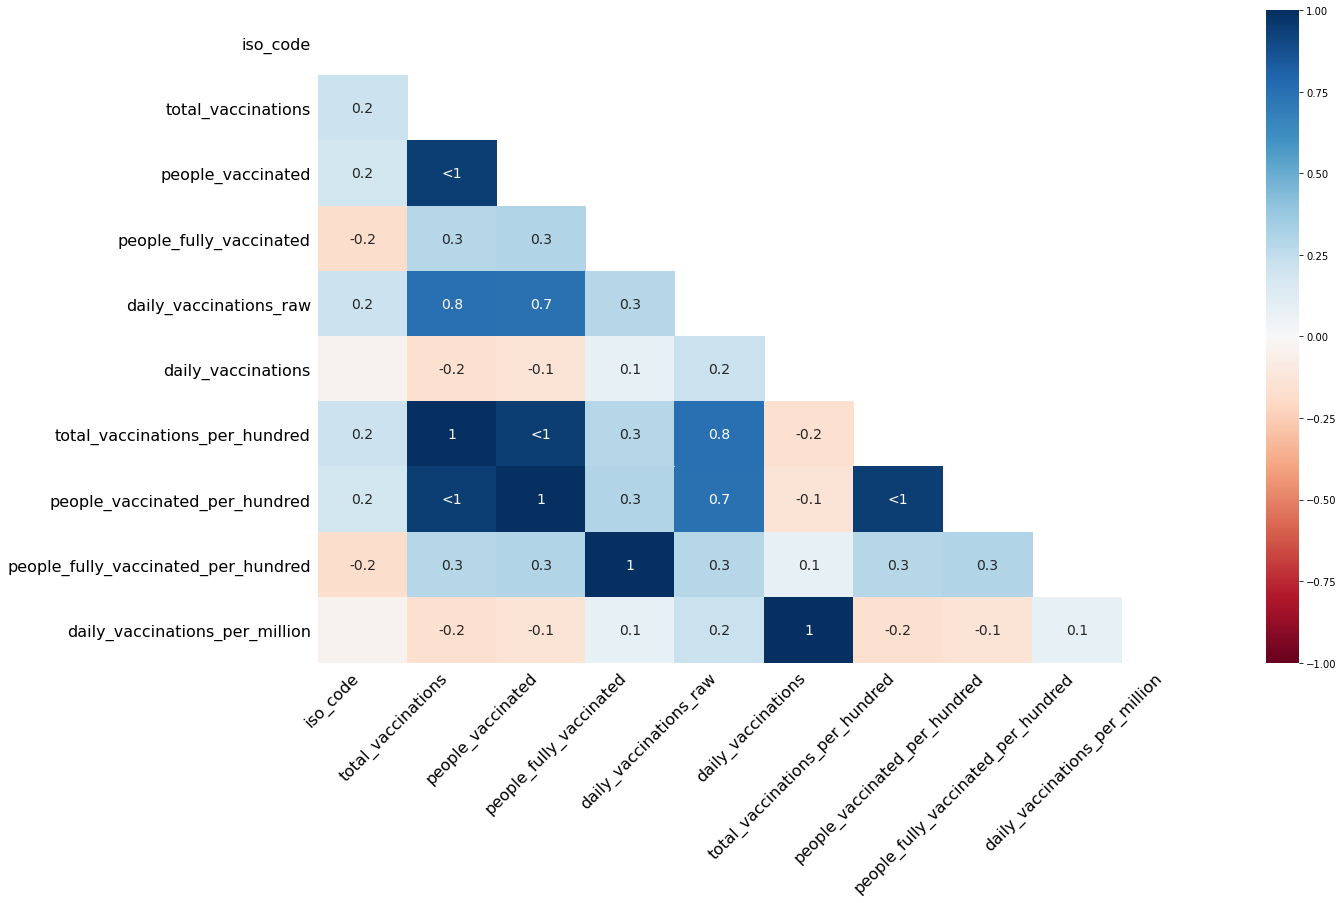

In [10]:
msno.heatmap(df) 

In [11]:
for vaccin, dataframe in dict_vaccines.items() :
    dict_vaccines[vaccin] = dataframe.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name','source_website'])

For now I have decided to keep only the daily vaccination data, it was the more filled with data and the easiest to understand.

In [12]:
for vaccin, dataframe in dict_vaccines.items() :
    dict_vaccines[vaccin] = dataframe.dropna()
    dict_vaccines[vaccin] = dict_vaccines[vaccin].rename(columns={'iso_code':'iso_a3'})

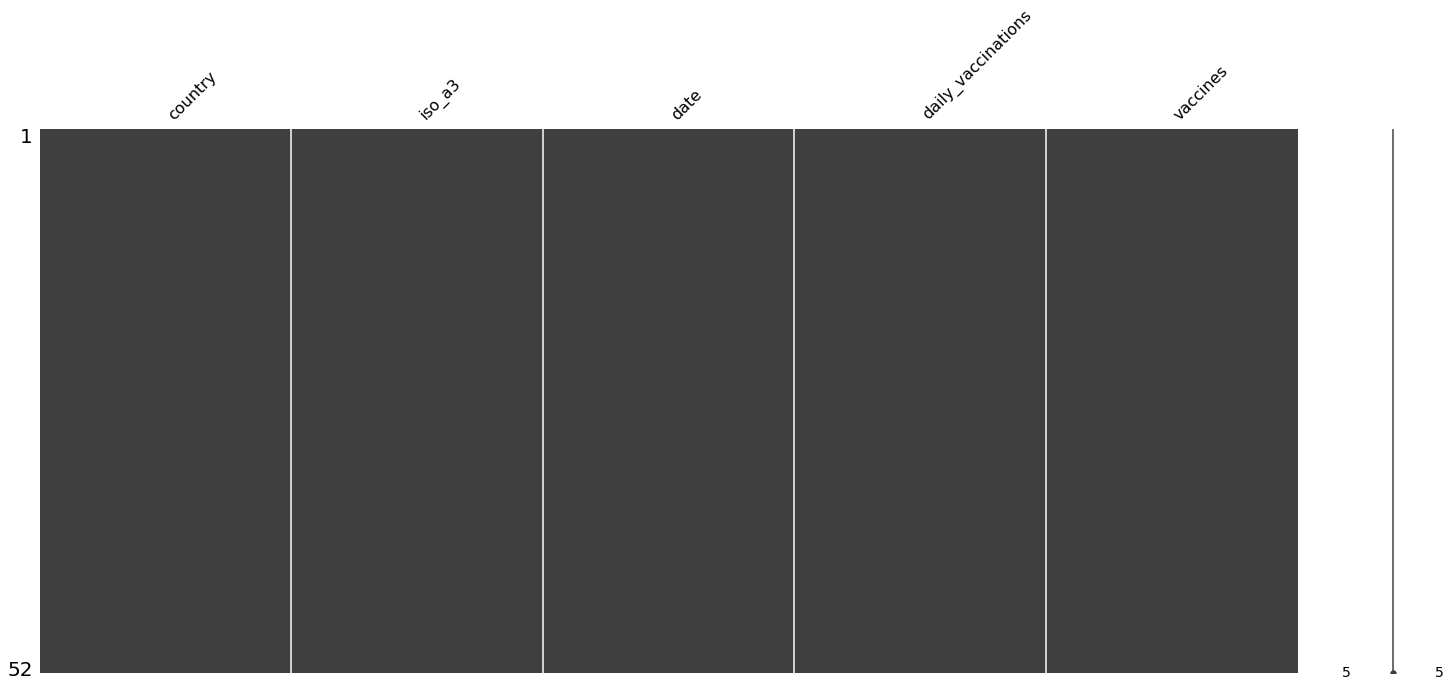

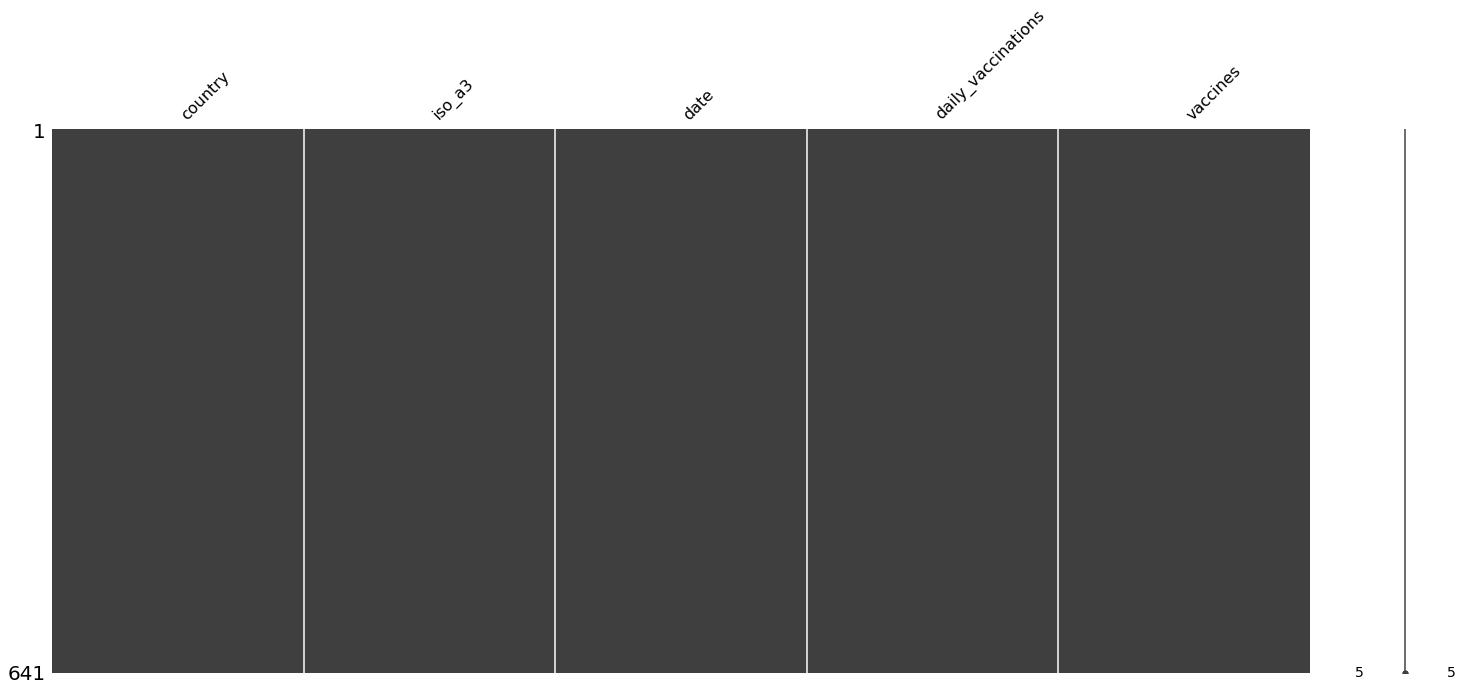

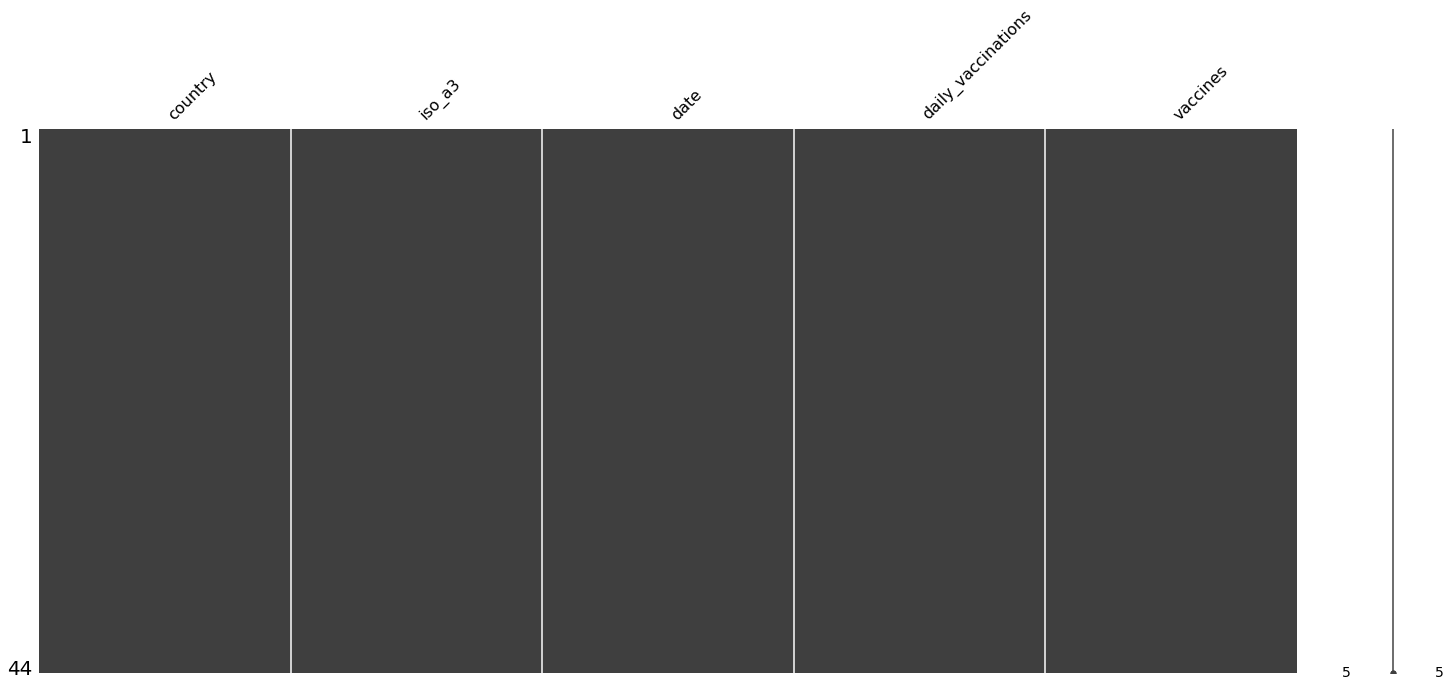

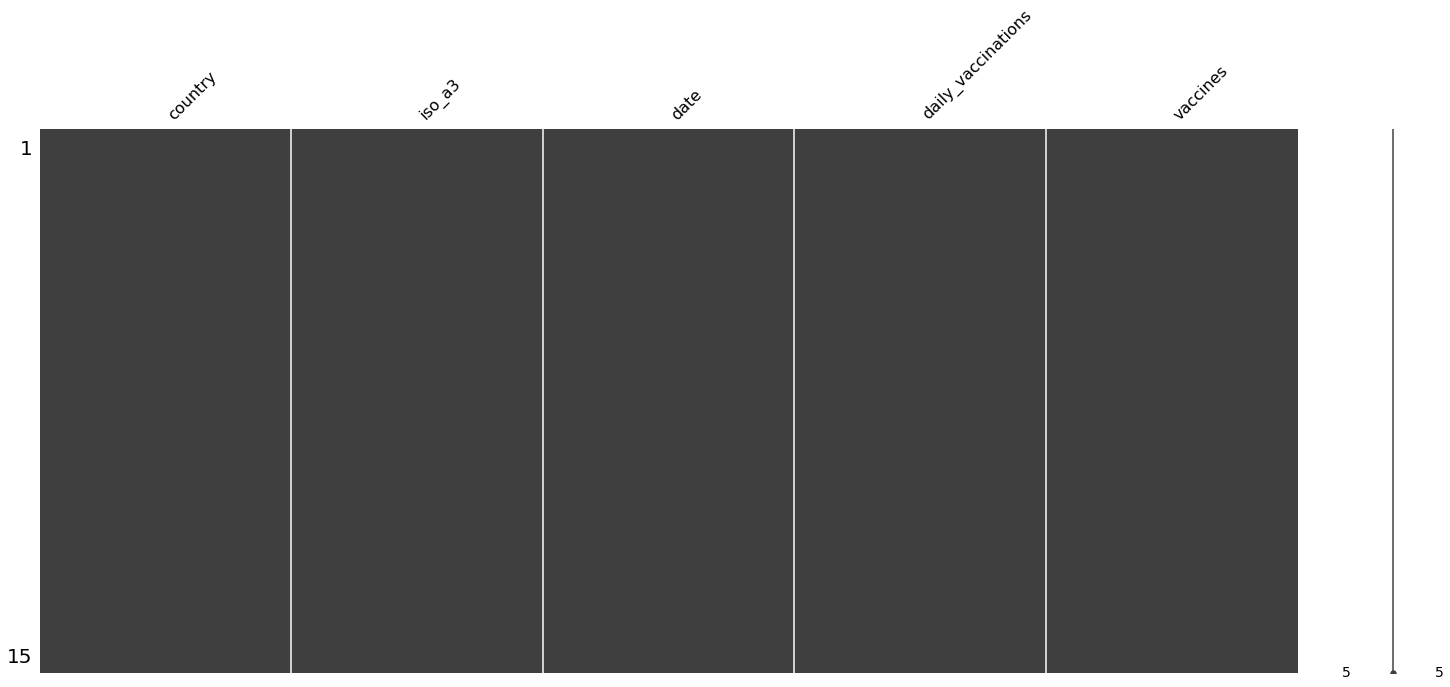

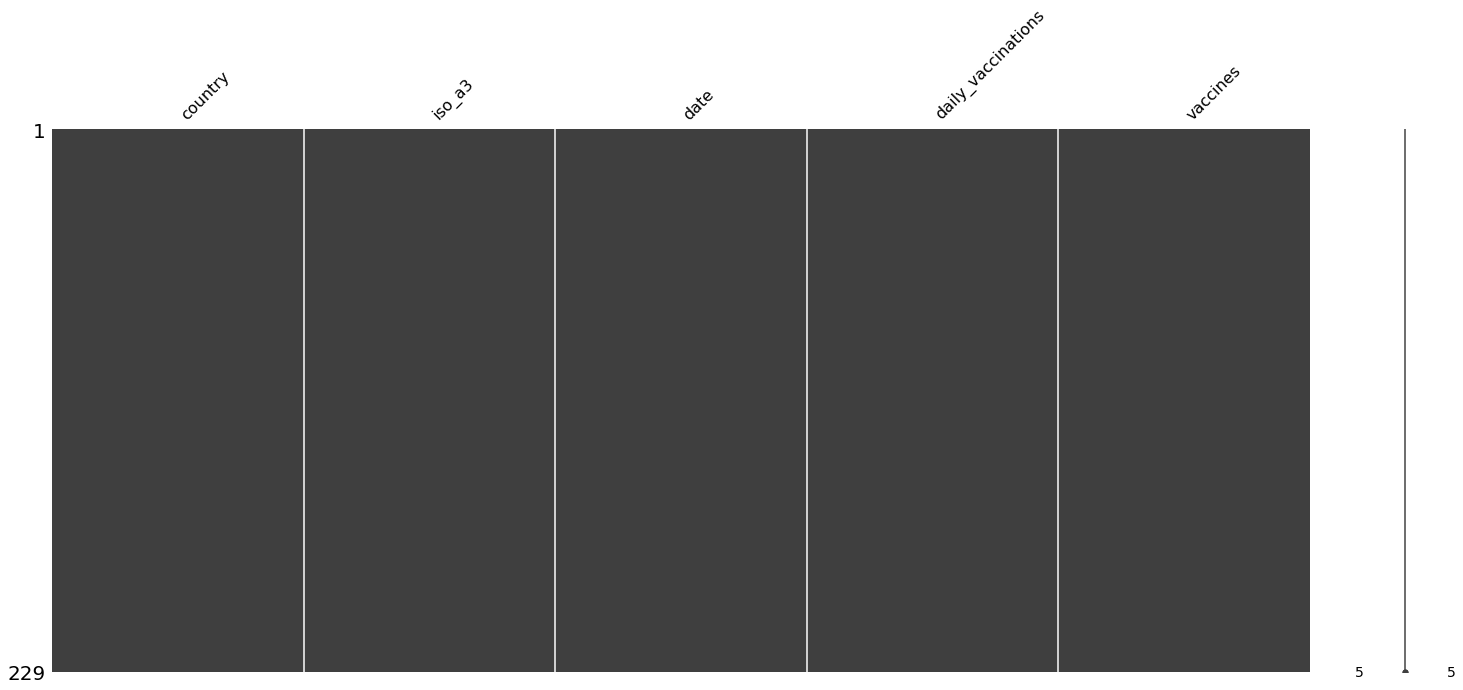

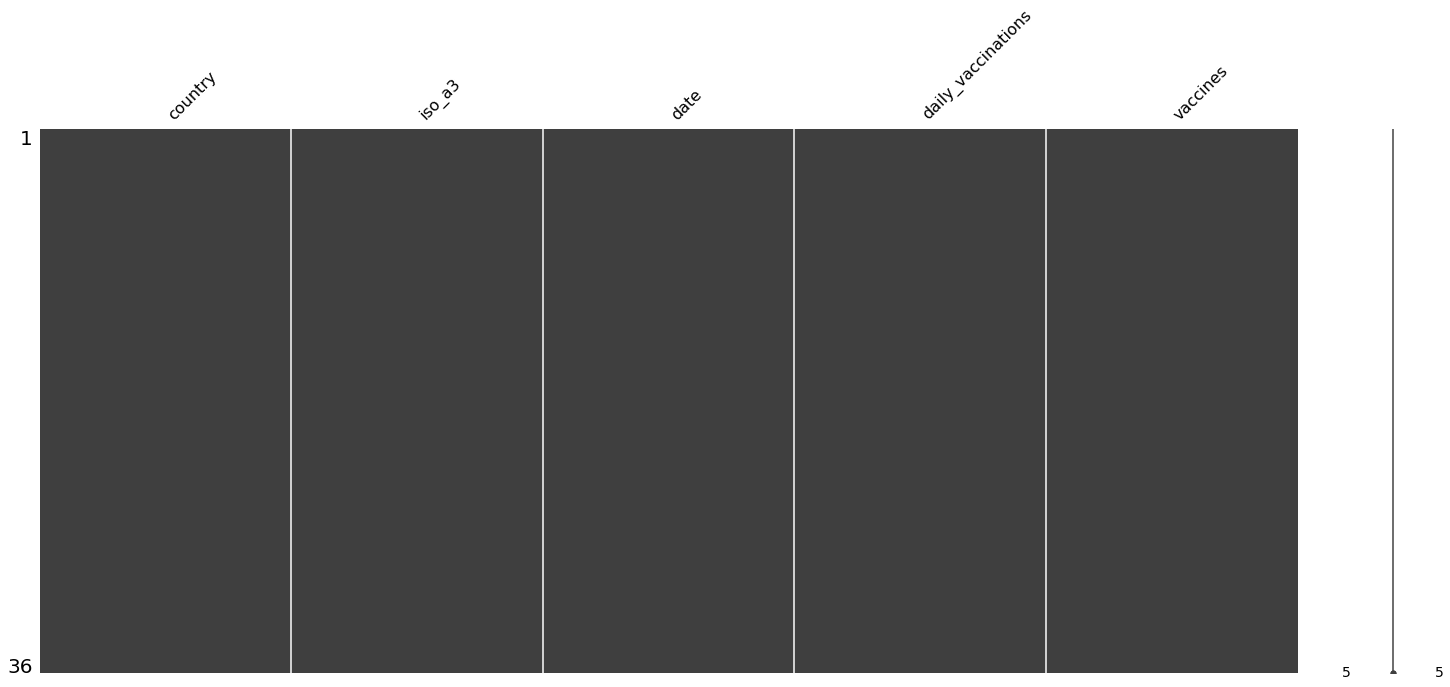

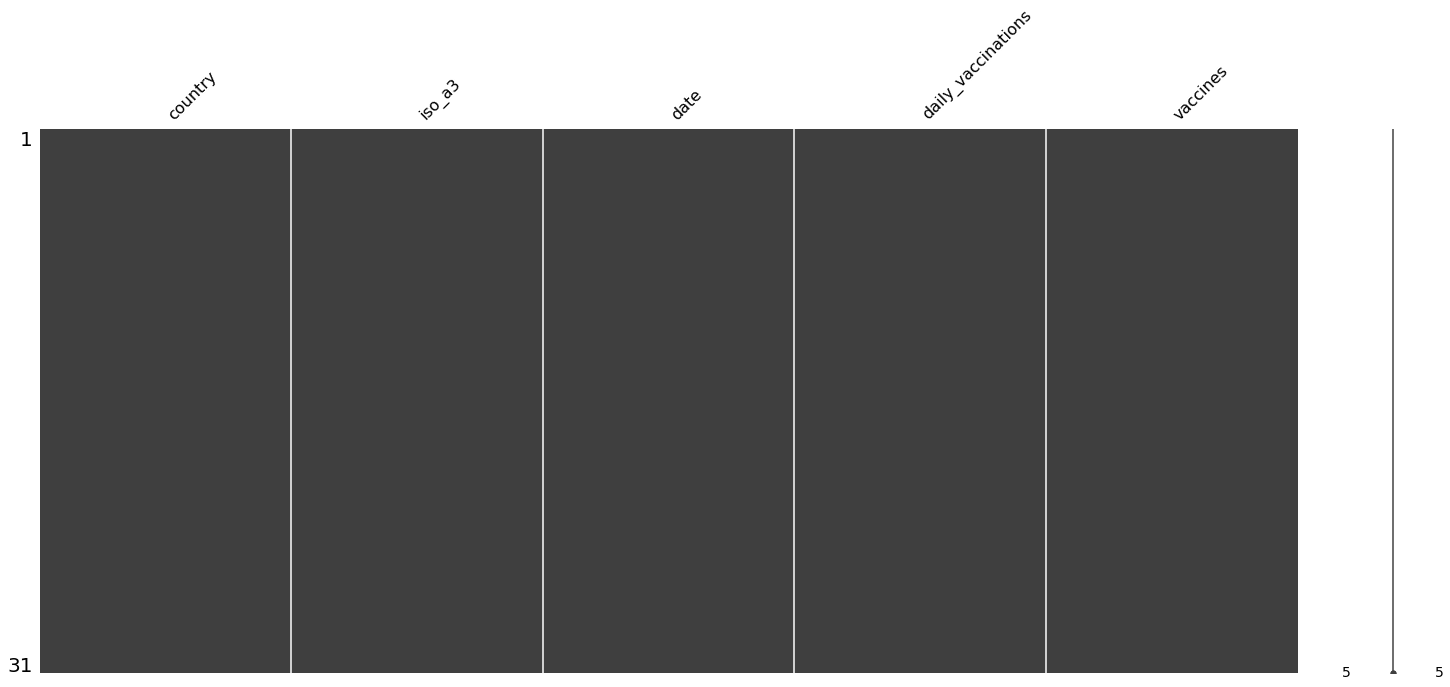

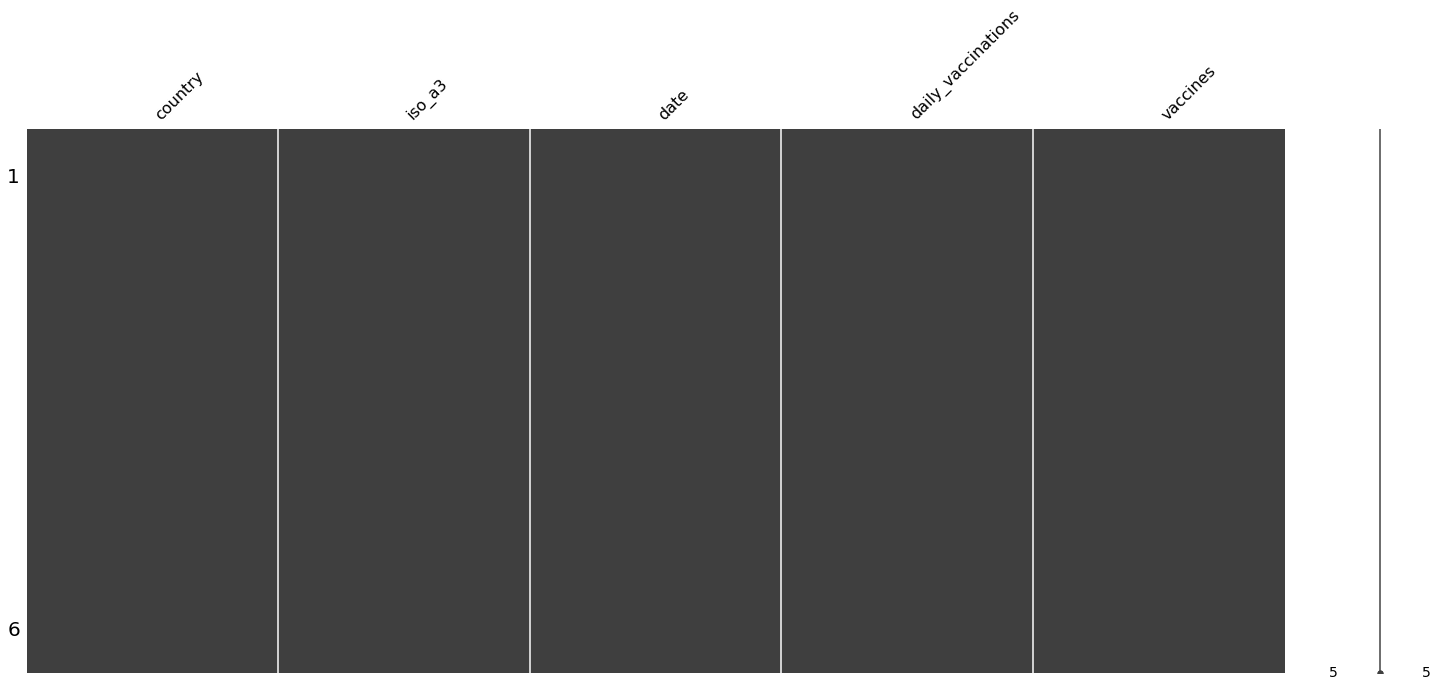

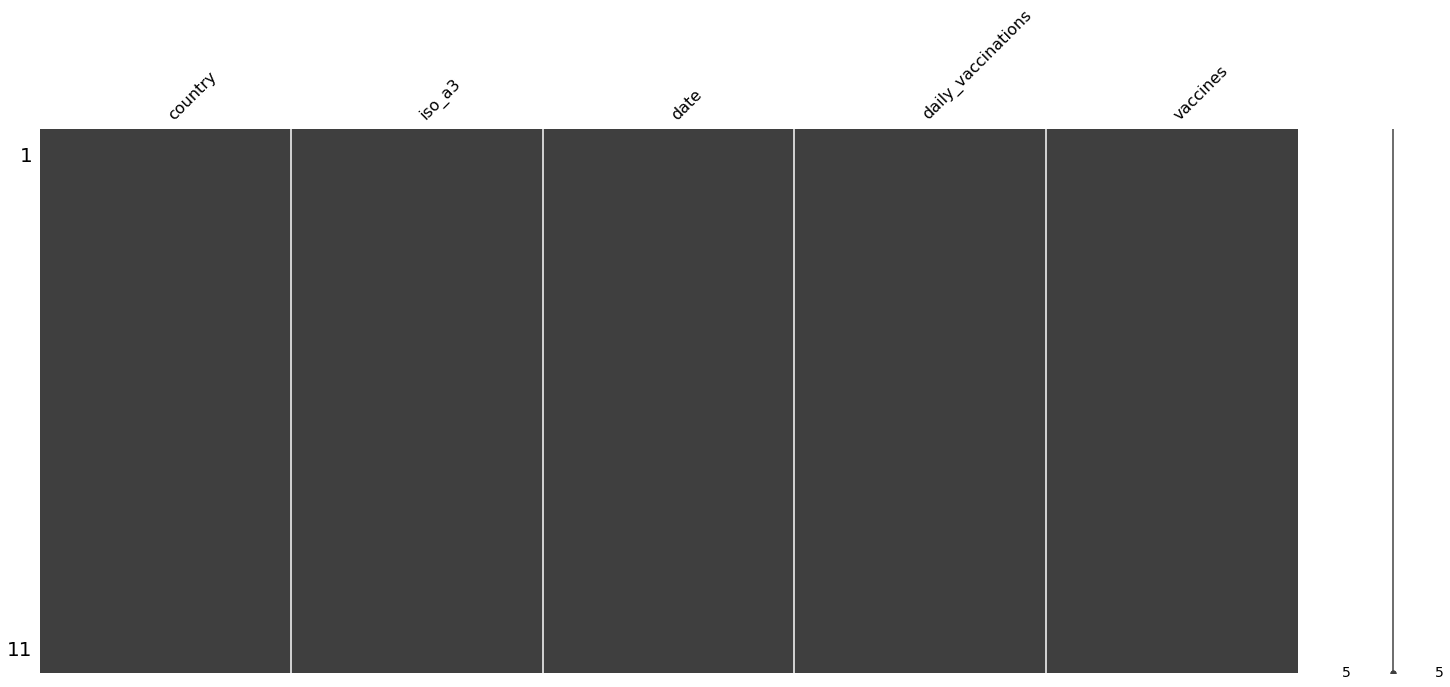

In [13]:
for dataframe in dict_vaccines.values() :
    msno.matrix(dataframe)

# Data Vizualisations
## 1.Heatmaps

In [14]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

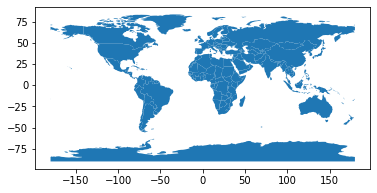

In [15]:
import matplotlib

world.plot()

In [16]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [17]:
world['iso_a3'] #what we want => merged according to this ?

0      FJI
1      TZA
2      ESH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    -99
175    TTO
176    SSD
Name: iso_a3, Length: 177, dtype: object

In [18]:
dict_map = {}
for vaccin, dataframe in dict_vaccines.items() :
    dict_map[vaccin] = world.merge(dataframe,on= 'iso_a3')

In [19]:
dict_map

{'df_Sputnik V':       pop_est      continent       name iso_a3  gdp_md_est  \
 0    44293293  South America  Argentina    ARG    879400.0   
 1    44293293  South America  Argentina    ARG    879400.0   
 2    44293293  South America  Argentina    ARG    879400.0   
 3    44293293  South America  Argentina    ARG    879400.0   
 4    44293293  South America  Argentina    ARG    879400.0   
 5    44293293  South America  Argentina    ARG    879400.0   
 6    44293293  South America  Argentina    ARG    879400.0   
 7    44293293  South America  Argentina    ARG    879400.0   
 8    44293293  South America  Argentina    ARG    879400.0   
 9    44293293  South America  Argentina    ARG    879400.0   
 10   44293293  South America  Argentina    ARG    879400.0   
 11   44293293  South America  Argentina    ARG    879400.0   
 12   44293293  South America  Argentina    ARG    879400.0   
 13   44293293  South America  Argentina    ARG    879400.0   
 14   44293293  South America  Argentin

In [20]:
import matplotlib.pyplot as plt

I have decided for now, since I am trying to understand the librairie at the same time as the dataset to do a sum over the different date, so to count all the people vaccinated (unless it count the same people 2 time ?).

<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-21-167d522b7162>:8: UserWarning: Matplotlib is cur

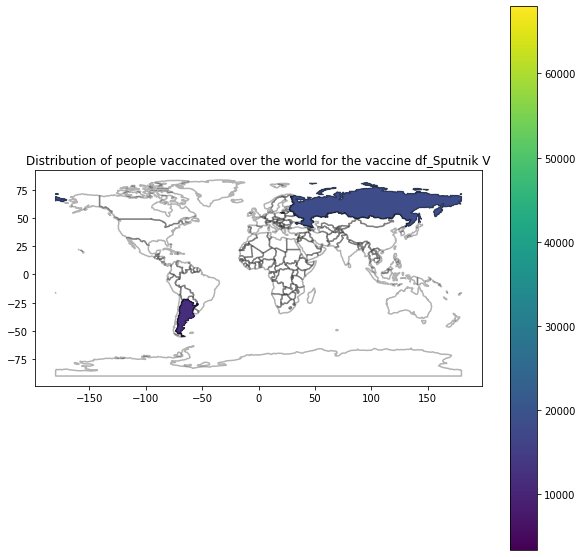

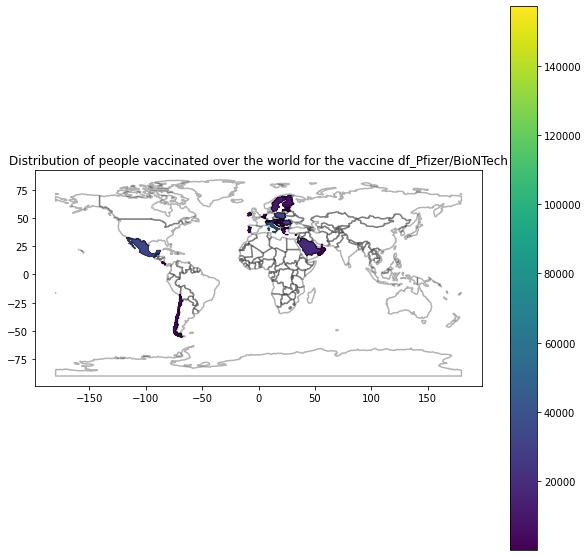

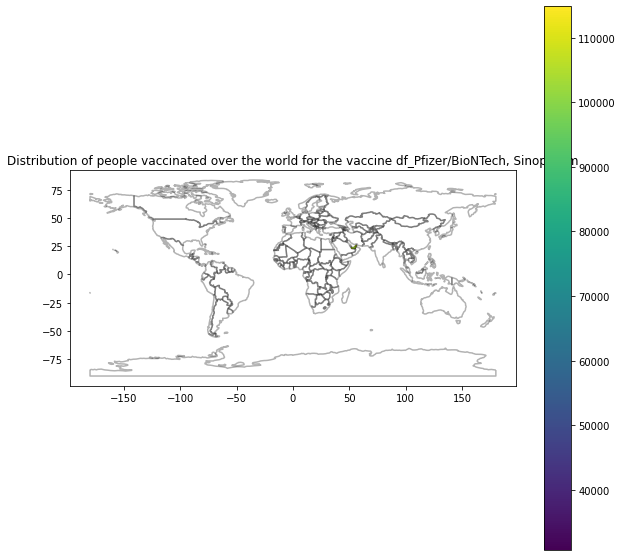

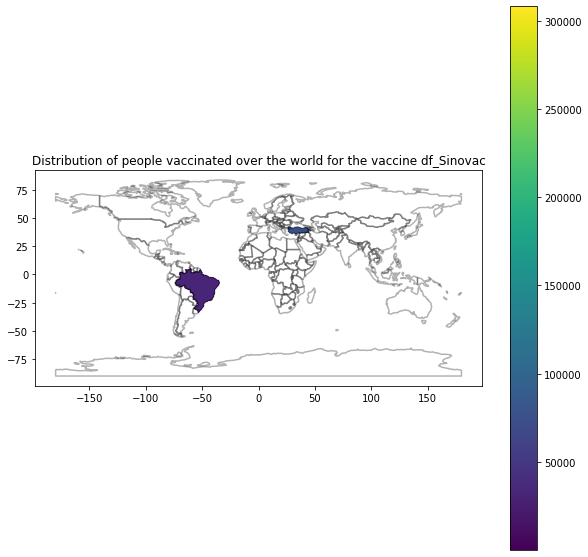

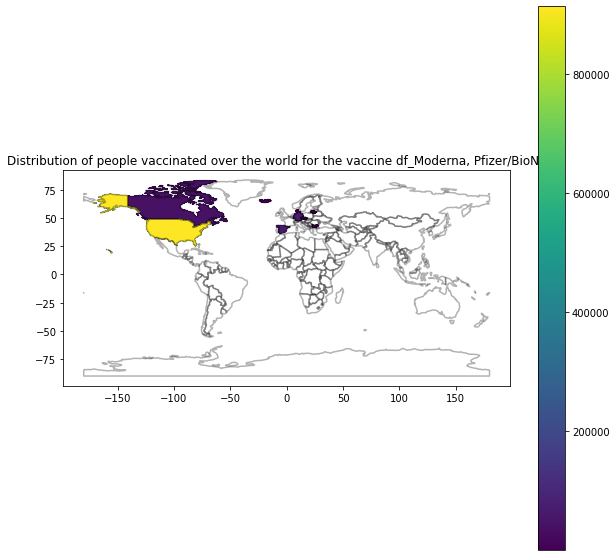

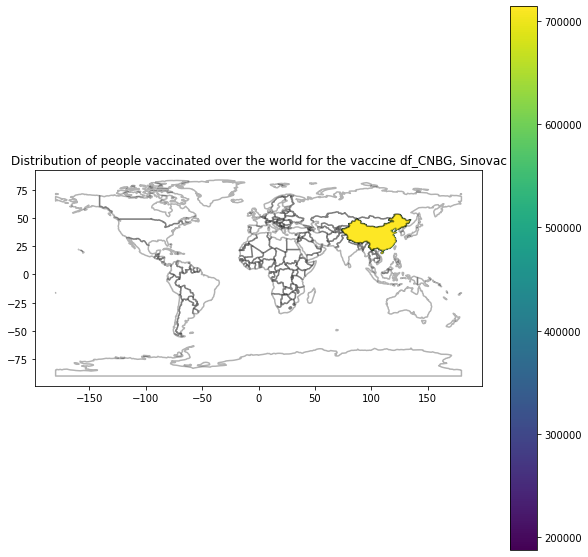

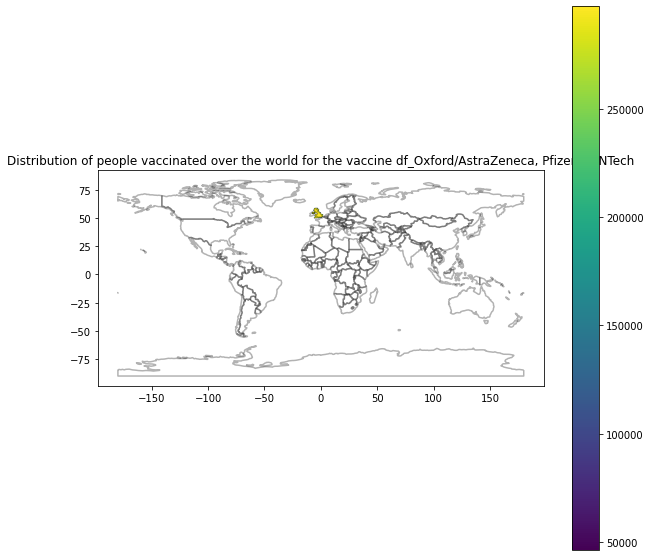

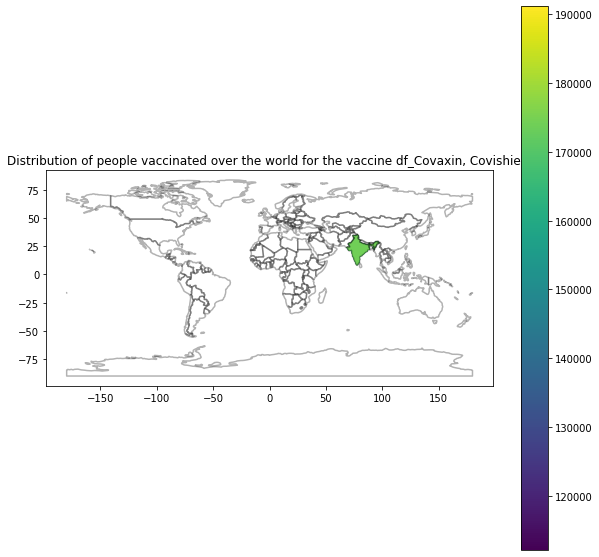

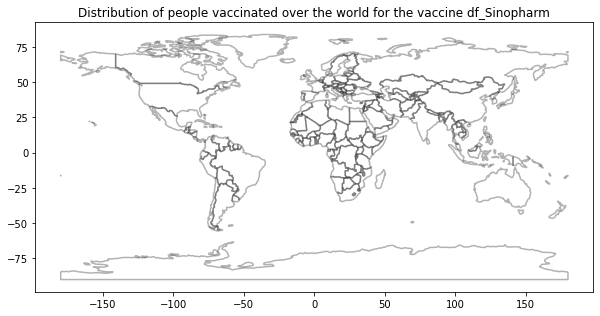

In [21]:
for vaccin, dataframe in dict_map.items() :
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    dataframe['daily_vaccinations']
    df_group = dataframe[['iso_a3','daily_vaccinations']].groupby(by = 'iso_a3').sum()
    dataframe.plot(column = 'daily_vaccinations',ax=ax,legend=True)
    world.boundary.plot(ax=ax,edgecolor='black',alpha = 0.3)
    ax.title.set_text('Distribution of people vaccinated over the world for the vaccine ' + vaccin)
    fig.show()

# Bokeh

In [22]:
import bokeh

In [23]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [24]:
from bokeh.io import show
from bokeh.plotting import figure

In [25]:
import datetime
dict_map['df_Sputnik V'].daily_vaccinations

0     15656.0
1     15656.0
2     11070.0
3      8776.0
4      7400.0
5      6483.0
6      7984.0
7      8173.0
8      8363.0
9     10519.0
10    11942.0
11    13365.0
12    14788.0
13    14056.0
14    13323.0
15    13320.0
16    13317.0
17    12971.0
18    12624.0
19    12278.0
20    11932.0
21    11586.0
22    11704.0
23     3357.0
24     3357.0
25     3357.0
26     3357.0
27     3357.0
28     3357.0
29     3357.0
30    12592.0
31    21827.0
32    31061.0
33    40296.0
34    49531.0
35    58765.0
36    68000.0
37    68000.0
38    68000.0
39    68000.0
40    68000.0
41    60883.0
42    53766.0
43    46649.0
44    39532.0
45    32416.0
46    25299.0
47    18182.0
48    18182.0
49    18182.0
50    18182.0
51    18182.0
Name: daily_vaccinations, dtype: float64

In [26]:
type(dict_map['df_Sputnik V'].loc[2].date)

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
p = figure(x_axis_type = 'datetime',y_range = pd.unique(dict_map['df_Sputnik V'].country),title = 'Vaccines given per day for Sputnik V')
p.circle(x=dict_map['df_Sputnik V'].date,y = dict_map['df_Sputnik V'].country,size = dict_map['df_Sputnik V'].daily_vaccinations/5000)
p.xaxis.axis_label = 'Day'
p.yaxis.axis_label = 'Country'
show(p)

In [90]:
from bokeh.models import ColumnDataSource
from bokeh.models import LinearInterpolator

source = ColumnDataSource(dict(
    date = df.date,
    countries = df.country,
    number_of_vaccines = df.people_vaccinated_per_hundred,
    type_of_vaccines = df.vaccines,
    daily_vaccinations= df.daily_vaccinations,
    fully_vaccinated = df.people_fully_vaccinated
    ))
#or can do source = ColumnDataSource(df)
size_mapper = LinearInterpolator(
    x = [df.daily_vaccinations.min(),df.daily_vaccinations.max()],
    y = [5,100]
)

In [83]:
from bokeh.models import HoverTool

In [84]:
hover = HoverTool(tooltips=[('Vaccines','@type_of_vaccines'),('Number of people vaccinated','@number_of_vaccines')],show_arrow = False)
p = figure(tools = [hover],x_axis_type = 'datetime',y_range = pd.unique(df.country),title = 'Evolution of people vaccinated over time per country',plot_width=1920, plot_height=1080)
p.circle(x='date',y='countries',size='number_of_vaccines',source = source)
p.xaxis.axis_label = 'Day'
p.yaxis.axis_label = 'Country'
show(p)

In [93]:
hover = HoverTool(tooltips=[('Vaccines','@type_of_vaccines'),('Country','@countries'),('Number of people vaccinated this day','@daily_vaccinations')],show_arrow = False)
p = figure(tools = [hover],x_axis_type = 'datetime',title = 'Evolution of number of people vaccinated througt time',plot_width=1920, plot_height=1080)
p.circle(
    x='date',
    y='number_of_vaccines',
    size={'field':'daily_vaccinations','transform':size_mapper},
    fill_color = 'countries',
    source = source)
p.xaxis.axis_label = 'Day'
p.yaxis.axis_label = 'Number of people vaccinated per million'
show(p)

In [95]:
hover = HoverTool(tooltips=[('Vaccines','@type_of_vaccines'),('Country','@countries'),('Number of people vaccinated this day','@daily_vaccinations')],show_arrow = False)
p = figure(tools = [hover],title = 'Evolution of number of people vaccinated per million according to the number of people fully vaccinated',plot_width=1920, plot_height=1080)
p.circle(
    x='fully_vaccinated',
    y='number_of_vaccines',
    size={'field':'daily_vaccinations','transform':size_mapper},
    fill_color = 'countries',
    source = source)
p.xaxis.axis_label = 'Number of people fully vaccinated'
p.yaxis.axis_label = 'Number of people vaccinated per million'
show(p)

Goal = to do that for each datetime. 
(1 plot for 1 date to see the evolution)